In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
angle = pd.read_csv('angle.csv')
loss = pd.read_csv('losses.csv')
reward = pd.read_csv('rewards.csv')

In [63]:
angle.head()

,Wall time,Step,Value
0,1.621430e+09,1,0.235319
1,1.621430e+09,2,0.890998
2,1.621430e+09,3,1.832524
3,1.621430e+09,4,2.919611
4,1.621430e+09,5,4.038129


In [64]:
def EMA(data, alpha=0.3):
    result = []
    for i, datum in enumerate(data):
        if i == 0:
            result.append(datum)
        else:
            result.append(alpha*datum+(1-alpha)*result[-1])
    return result

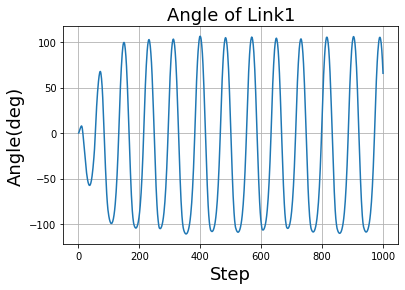

In [65]:
plt.plot(angle['Step'], angle['Value'])
plt.grid(True)
size = 18
plt.title('Angle of Link1', fontsize=size)
plt.xlabel('Step', fontsize=size)
plt.ylabel('Angle(deg)', fontsize=size)
plt.show()

In [66]:
loss['Value'][3]

130.17617797851562

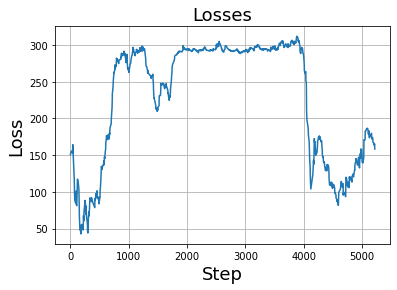

In [67]:
loss_value = EMA(loss['Value'], alpha=0.1)
plt.plot(loss['Step'], loss_value)
plt.grid(True)
size = 18
plt.title('Losses', fontsize=size)
plt.xlabel('Step', fontsize=size)
plt.ylabel('Loss', fontsize=size)
plt.show()

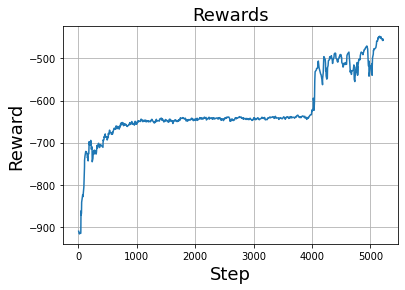

In [68]:
reward_value = EMA(reward['Value'], alpha=0.2)
size = 18
plt.plot(reward['Step'], reward_value)
plt.grid(True)
plt.title('Rewards', fontsize=size)
plt.xlabel('Step', fontsize=size)
plt.ylabel('Reward', fontsize=size)
plt.show()

In [159]:
def plot_fft(x, y):
    sampling_time = 0.025
    n = len(y)
    x = x*sampling_time
    fft_data = np.fft.fft(y)/n
    fft_data = fft_data[range(n//2)]
    fft_mag_data = np.abs(fft_data)
    plt.figure(figsize=(5,3))
    plt.subplot(2,1,1)
    plt.title('FFT')
    plt.plot(x, y)
    plt.xlabel('sec')
    plt.ylabel('deg')
    plt.grid(True)

    plt.subplot(2,1,2)
    plt.grid(True)
    plt.xlim([0.1, 25])
    plt.ylabel('mag')
    plt.xlabel('frequency')
    markerline, stemlines, baseline = plt.stem(fft_mag_data)
    plt.setp(stemlines, 'linewidth', 2)
    plt.setp(markerline, 'markersize', 10)
    plt.show()

    print(np.argmax(fft_mag_data))

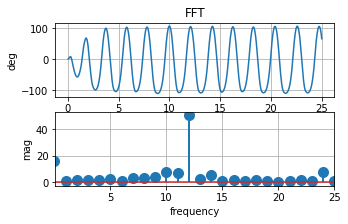

12


In [164]:
plot_fft(angle['Step'], angle['Value'])

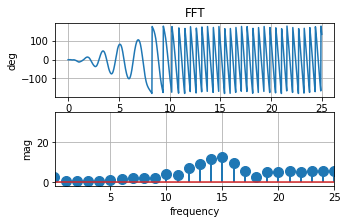

45


In [165]:
angle_bad = pd.read_csv('angle_bad.csv')
plot_fft(angle_bad['Step'], angle_bad['Value'])

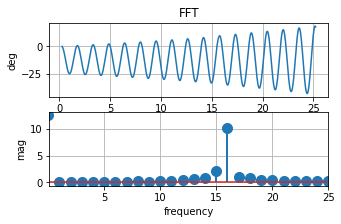

0


In [166]:
angle_bad2 = pd.read_csv('angle_bad2.csv')
plot_fft(np.array(angle_bad2['Step'])+10, angle_bad2['Value'])